# Git analytics tools

In [2]:
# copy example repository: uncomment required variant

#cp ./path_to_repository ./test_repo
#cd ./test_repo

#git clone ... test_repo
#cd ./test_repo

Cloning into 'test_repo'...
remote: Not Found
fatal: repository 'https://github.com/gryazevae/' not found


### Commits count

In [10]:
import matplotlib.pyplot as plt
import subprocess
from datetime import datetime

def get_commit_history():
    git_log = subprocess.Popen(['git', 'log', '--all', '--format=%ct'], stdout=subprocess.PIPE)
    output, _ = git_log.communicate()
    commit_dates = output.decode().split('\n')[:-1]
    return sorted([datetime.fromtimestamp(int(date)) for date in commit_dates])

def count_commits_per_month(commit_dates):
    first_date = commit_dates[0].replace(day=1, hour=0, minute=0, second=0, microsecond=0)                # Устанавливаем начальную дату на первое число текущего месяца
    last_date = commit_dates[-1].replace(day=1, month= (commit_dates[-1].month+1) % 12 + ((commit_dates[-1].month+1) // 12), year = commit_dates[-1].year + ((commit_dates[-1].month+1) // 12))       
    start_date = first_date               # Устанавливаем начальную дату на первое число текущего месяца
    end_date = start_date.replace(day=1, month= (start_date.month+1) % 12 + ((start_date.month+1) // 12), year = start_date.year + ((start_date.month+1) // 12))                                      # Устанавливаем конечную дату на первое число следующего месяца
    commit_counts = []
    while end_date <= last_date:
        count = 0
        for date in commit_dates:
            if (date <= end_date) and (date >= start_date) :
                count += 1
        commit_counts.append(count)
        start_date = end_date
        #print(end_date)
        #print((end_date.month+1) % 12  + ((start_date.month+1) // 12))
        end_date = end_date.replace(day=1, month= (end_date.month+1) % 12 + ((start_date.month+1) // 12), year = end_date.year + ((start_date.month+1) // 12))  
    return commit_counts

def plot_commit_frequency(commit_dates, commit_counts):
    plt.bar(commit_dates, commit_counts, width=timedelta(days=30))
    plt.xlabel('Месяц')
    plt.ylabel('Частота коммитов')
    plt.title('Сумма коммитов каждый месяц во всех ветках')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Сумма коммитов каждый месяц во всех ветках')

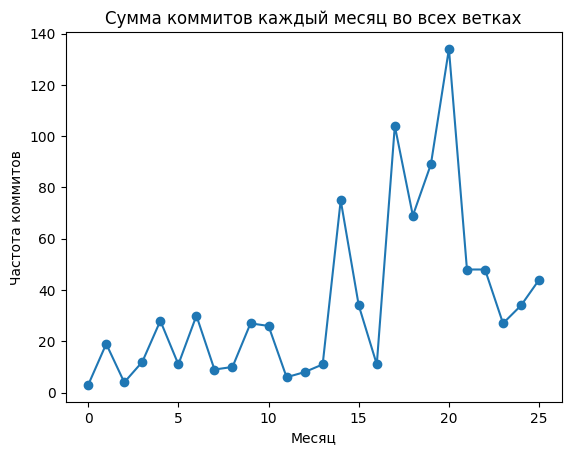

In [18]:
commit_dates = get_commit_history()
commit_counts = count_commits_per_month(commit_dates)
plt.plot(commit_counts, '-o')
plt.xlabel('Месяц')
plt.ylabel('Частота коммитов')
plt.title('Сумма коммитов каждый месяц во всех ветках')
#plot_commit_frequency(commit_dates, commit_counts)

### Was commits before 22:00?

In [30]:
import datetime
from git import Repo
import difflib

def count_changed_lines(commit):
    try:
        repo = commit.repo
        diff = commit.diff(commit.parents[0])  # Получаем разницу между текущим и предыдущим коммитом

        total_changed_lines = 0
        print(1)
        for change in diff:
            old_blob = change.a_blob
            new_blob = change.b_blob
            print(change)
            if old_blob is None:  # Новый файл
                changed_lines = len(new_blob.data_stream.read().decode('utf-8').splitlines())
            else:
                diff_data = difflib.unified_diff(
                    old_blob.data_stream.read().decode('utf-8').splitlines(),
                    new_blob.data_stream.read().decode('utf-8').splitlines(),
                    lineterm='',
                )
                changed_lines = sum(1 for line in diff_data if line.startswith('+') or line.startswith('-'))
            
            total_changed_lines += changed_lines
        
        return total_changed_lines
    
    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None

def check_commits(repo_path, target_date):
    repo = Repo(repo_path)
    commits = list(repo.iter_commits())
    was_commits = False
    for commit in commits:
        commit_date = datetime.datetime.fromtimestamp(commit.committed_date)
        if commit_date.date() == target_date and commit_date.time() < datetime.time(22, 0):
            print(f"Commit on {target_date} before 22:00: {commit.hexsha}")
            was_commits = True
            changed_lines_count = count_changed_lines(commit)
            print(f"Количество измененных строк в коммите {commit.hexsha}: {changed_lines_count}")
    return was_commits

# Пример использования
target_date = datetime.date(2023, 8, 23)
#target_date = datetime.date.today()  
repo_path = './'
check_commits(repo_path, target_date)

Commit on 2023-08-23 before 22:00: c4ac0c3cc4cec86c1b41d37b84a1cc1213879e9d
Error occurred: tuple index out of range
Количество измененных строк в коммите c4ac0c3cc4cec86c1b41d37b84a1cc1213879e9d: None


True

In [24]:
os.getcwd()

'c:\\SideProjects\\MyGit\\git_tools\\test_repo'

In [25]:
cd ../

c:\SideProjects\MyGit\git_tools
